In [1]:
from Binet import *
from Strassen import *
from helpers import *
from stats import *
import pandas as df
df.set_option('display.width', None)
df.set_option('display.max_columns', None)

In [2]:
A = random_matrix(7, 7)
B = random_matrix(7, 7)

In [3]:

functions = [binet_two_split_benchmark, binet_without_padding_benchmark, strassen_without_padding_benchmark, numpy_benchmark]
names = ["Binet dzielenie na 2", "Binet bez paddingu", "Strassen bez paddingu", "Wbudowane"]

<div style="text-align: begin; font-size:23px;">
    <b>Algorytm Bineta</b><br>
    Pseudokod rekurencyjny
</div>

```text
    Algorithm BINET(A, B):
    if size(A) = 1 then
        return A * B

    Divide X into quadrants:
    X11 ← X[1 : n/2, 1 : k/2]
    X12 ← X[1 : n/2, k/2+1 : k]
    X21 ← X[n/2+1 : n, 1 : k/2]
    X22 ← X[n/2+1 : n, k/2+1 : k]

    Divide Y into quadrants:
    Y11 ← Y[1 : k/2, 1 : m/2]
    Y12 ← Y[1 : k/2, m/2+1 : m]
    Y21 ← Y[k/2+1 : k, 1 : m/2]
    Y22 ← Y[k/2+1 : k, m/2+1 : m]

    Compute:
    C11 = BINET(X11, Y11) + BINET(X12, Y21)
    C12 = BINET(X11, Y12) + BINET(X12, Y22)
    C21 = BINET(X21, Y11) + BINET(X22, Y21)
    C22 = BINET(X21, Y12) + BINET(X22, Y22)

    return matrix C = [C11 C12; C21 C22]
```


<div style="text-align: begin; font-size:23px;">
    <b>Algorytm Bineta</b><br>
    Najważniejsze elementy kodu
</div>

```python

def binet_without_padding(X: np.ndarray, Y: np.ndarray):
    n, k = X.shape
    _, m = Y.shape

    if min(n, k, m) == 1:
        return X @ Y
    
    n //= 2
    m //= 2
    k //= 2

    X11 = X[:n, :k]
    X12 = X[:n, k:]
    X21 = X[n:, :k]
    X22 = X[n:, k:]
    Y11 = Y[:k, :m]
    Y12 = Y[:k, m:]
    Y21 = Y[k:, :m]
    Y22 = Y[k:, m:]

    Z11 = binet_without_padding(X11, Y11) + binet_without_padding(X12, Y21)
    Z12 = binet_without_padding(X11, Y12) + binet_without_padding(X12, Y22)
    Z21 = binet_without_padding(X21, Y11) + binet_without_padding(X22, Y21)
    Z22 = binet_without_padding(X21, Y12) + binet_without_padding(X22, Y22)

    top = np.hstack((Z11, Z12), dtype=Float)
    bot = np.hstack((Z21, Z22), dtype=Float)
    return np.vstack((top, bot), dtype=Float)  
```


In [4]:
avg_df =  create_statistics(n = 2, m = 20, k = 10, functions = [binet_without_padding_benchmark],names = ['binet'])

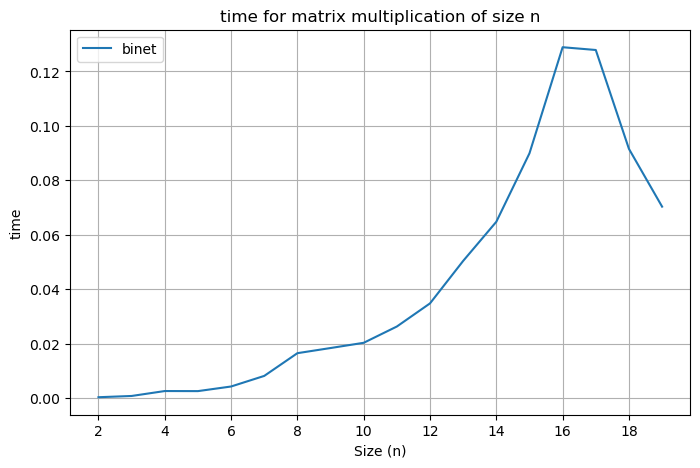

In [5]:

plot_metric(avg_df, 'time')


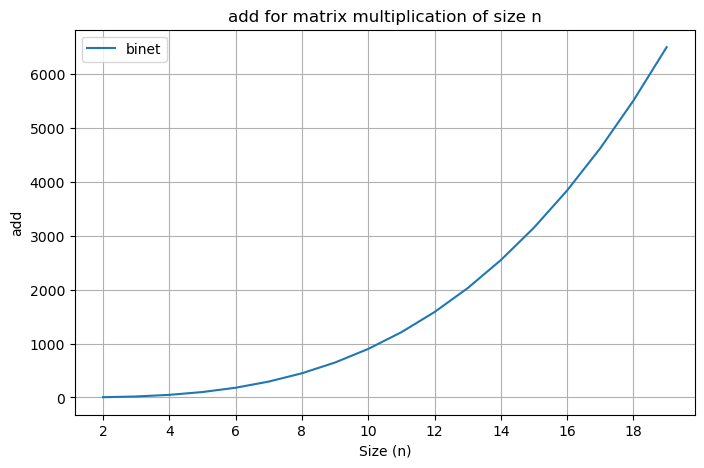

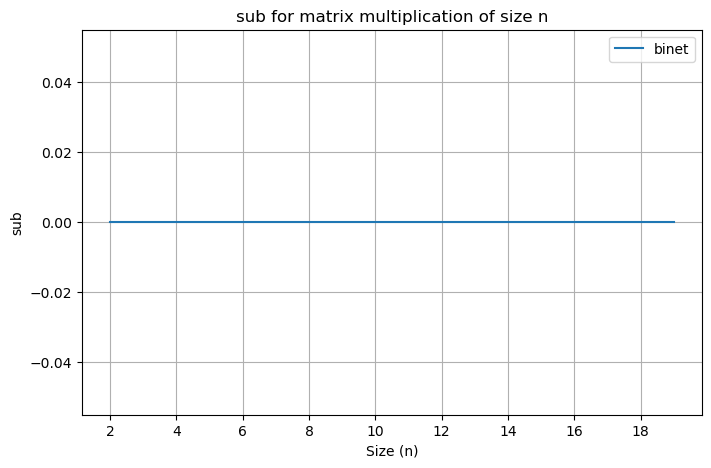

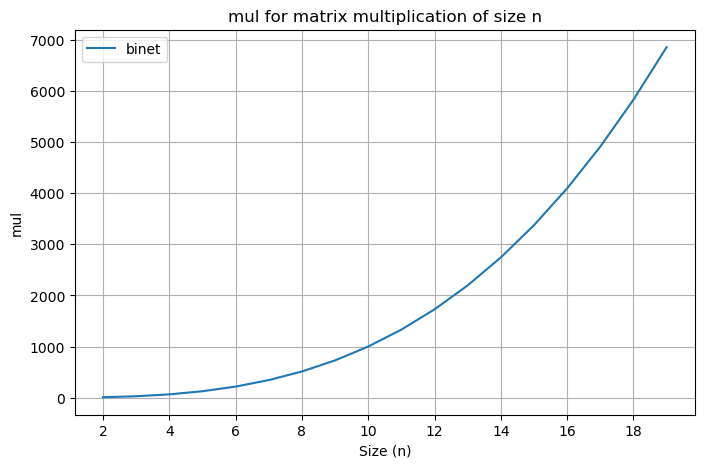

In [6]:
plot_metric(avg_df, 'add')
plot_metric(avg_df, 'sub')
plot_metric(avg_df, 'mul')

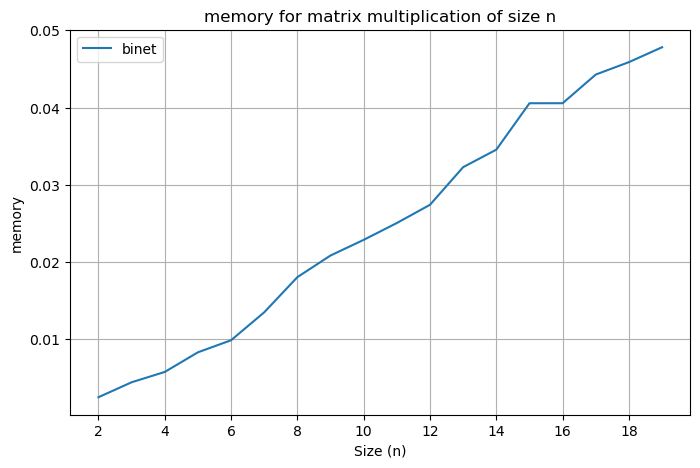

In [7]:
plot_metric(avg_df, 'memory')